In [55]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])
from scipy import constants

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot

In [16]:
Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Git\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Pouch"
Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 5
Loading... Folder 1 of 1, Sample 2 of 5
Loading... Folder 1 of 1, Sample 3 of 5
Loading... Folder 1 of 1, Sample 4 of 5
Loading... Folder 1 of 1, Sample 5 of 5


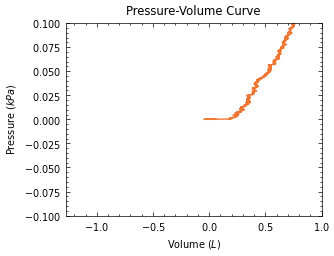

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
P = np.array(data[0][-1]['SSCDP05-3'])  # Pressure data in Pa
Q = np.array(data[0][-1]['AWM5-12'])   # Flow rate data in SLPM

# Sampling frequency is 1000 Hz, so time interval is 0.001 seconds
sampling_frequency = 1000  # Hz
time_interval = 1 / sampling_frequency  # seconds

# Convert SLPM to liters per time interval (1 SLPM = 1/60 L/s)
Q_lps = Q / 60  # Liters per second
Q_per_interval = Q_lps * time_interval  # Liters per 0.001 seconds

# Time array
time = np.arange(len(Q)) * time_interval

# Numerical integration (cumulative sum) to get Volume in liters
Volume = np.cumsum(Q_per_interval)

# Convert P to kilopascals if necessary
Pressure = P / 1000

# Plotting Pressure-Volume curve
plt.plot(Pressure, Volume)
plt.xlabel('Volume ($L$)')
plt.ylabel('Pressure ($kPa$)')
plt.title('Pressure-Volume Curve')
plt.xlim(None,1)
plt.ylim(-0.1,0.1)
plt.show()


In [49]:
# Determine volume by finding where the pressure is higher than 0
Volume[np.argwhere(Pressure>1e-1)][0]*1000 #L 

array([0.18453219])

In [61]:
# Pressure generation 
# 0 = volume of fixed container
# v1 = volume of compressed air 
# p1 = desired pressure 
#Goal n_novec for given pressure 
p1 = 50e3
P_amb = 1e5
V_bottle = 1e-3
rho_air = 1.204 # kg/m3 @ P_amb and 20 deg 
M_air = 28.9647e-3 # kg/mol
n_air = rho_air*V_bottle/M_air 
n_air

R = constants.R

T_amb = 40+273

v1= n_air*R*T_amb/(p1+P_amb)
v1

V_novec = V_bottle-v1
n_novec = (p1+P_amb)*V_novec/(R*T_amb)

# Vapor mass 
M = 200 # g/mol
m_novec = M*n_novec
m_novec


3.214133866782886